In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [150]:
data = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/signal_q0_10_0_0.1.txt')
data1 = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/signal_q-0.5_10_0_0.1.txt')
data2 = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/signal_q0.5_10_0_0.1.txt')
#data3 = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/signal_q0_10_0_1.5.txt')
#data4 = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/signal_q0_10_0_1.5.txt')

#check with Julieta to make sure this is correct
step_time_out = 2
time = np.linspace(0,(len(data)-1)*step_time_out,len(data))

assert len(data)==len(time),"lengths do not match up"

In [151]:
#the code below finds the drift time of the waveform
def drift_time(chargeVals):
    dy = np.diff(chargeVals)
    dx = step_time_out
    slope = dy/dx
    secondSlope=np.diff(dy)/dx
    maxIndex = np.where(slope==(max(slope)))[0]
    cutTime = 0
    assert slope[maxIndex] == max(slope)
    for i in range(0, len(slope)):
        if slope[i]<=0.01*max(slope) and i>=maxIndex:
            cutTime=time[i]
            break
    return cutTime

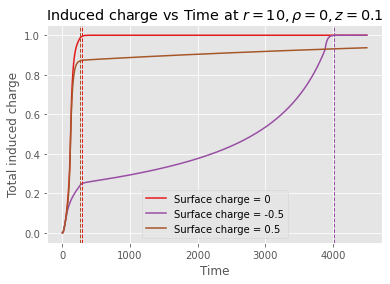

In [152]:
cmap = plt.get_cmap('Set1')
colors = cmap(np.linspace(0, 1.0, 4))
plt.plot(time[time<4500],data[time<4500],'-',markersize=2,color=colors[0])
plt.plot(time[time<4500],data1[time<4500],'-',markersize=2,color=colors[1])
plt.plot(time[time<4500],data2[time<4500],'-',markersize=2,color=colors[2])
plt.title('Induced charge vs Time at $r=10,\\rho=0,z=0.1$')
plt.xlabel('Time')
plt.ylabel('Total induced charge')
plt.axvline(drift_time(data), color=colors[0], linestyle='dashed', linewidth=1)
plt.axvline(drift_time(data1), color=colors[1], linestyle='dashed', linewidth=1)
plt.axvline(drift_time(data2), color=colors[2], linestyle='dashed', linewidth=1)
plt.legend(['Surface charge = 0','Surface charge = -0.5','Surface charge = 0.5'])
plt.show()

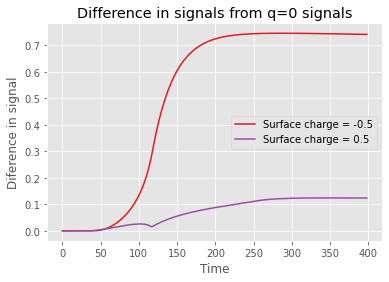

In [153]:
plt.plot(time[time<400],data[time<400]-data1[time<400],'-',color=colors[0])
plt.plot(time[time<400],data[time<400]-data2[time<400],'-',color=colors[1])
plt.title('Difference in signals from q=0 signals')
plt.xlabel('Time')
plt.ylabel('Diference in signal')
plt.legend(['Surface charge = -0.5','Surface charge = 0.5'])
plt.show()

In [154]:
data_hole = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/Signals/q=0/signal_hole_q0_10_0_1.5.txt')
data_elec = np.loadtxt('/home/kevinhbhimani/Desktop/Siggen simulations/icpc_siggen/Signals/q=0/signal_elec_q0_10_0_1.5.txt')

#check with Julieta to make sure this is correct
step_time_out = 2

assert len(data_hole)==len(time),"lengths do not match up"

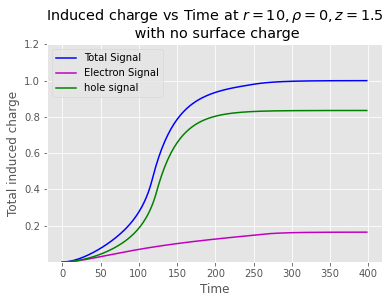

In [155]:
plt.plot(time[time<400],data[time<400],'b-')
plt.plot(time[time<400],data_elec[time<400],'m-')
plt.plot(time[time<400],data_hole[time<400],'g-')
#plt.plot(time[time<400],(data_elec[time<400]+data_hole[time<400]),'y-')
plt.title('Induced charge vs Time at $r=10,\\rho=0,z=1.5$\n with no surface charge')
#plt.title('wow this works $\pi$')
plt.xlabel('Time')
plt.ylabel('Total induced charge')
plt.legend(['Total Signal','Electron Signal','hole signal'])
plt.ylim(0.001,1.2)
#plt.yscale('log')
plt.show()

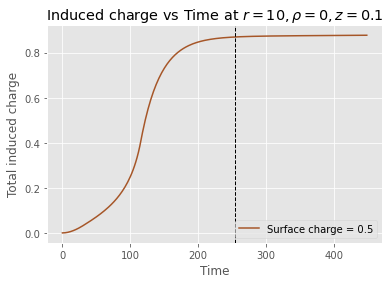

In [156]:
plt.plot(time[time<450],data2[time<450],'-',markersize=2,color=colors[2])
plt.title('Induced charge vs Time at $r=10,\\rho=0,z=0.1$')
plt.xlabel('Time')
plt.ylabel('Total induced charge')
plt.axvline(drift_time(data2), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(drift_time(data1), color=colors[1], linestyle='dashed', linewidth=1)
#plt.axvline(drift_time(data2), color=colors[2], linestyle='dashed', linewidth=1)
plt.legend(['Surface charge = 0.5'])
plt.show()